<a href="https://colab.research.google.com/github/ramajayamj/Mainflow-Internship-Task/blob/main/internshiptask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1: General EDA**

In [7]:
import pandas as pd
import numpy as np
file_path = '/content/Global_Superstore(CSV) (1).csv'
data = pd.read_csv(file_path)
for col in data.select_dtypes(include=[np.number]):
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)
for col in data.select_dtypes(include=[object]):
    if data[col].isnull().sum() > 0:
        data[col].fillna('Missing', inplace=True)
data.drop_duplicates(inplace=True)
for col in data.select_dtypes(include=[np.number]):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
cleaned_file_path = 'cleaned_dataset.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Data cleaning complete. Cleaned dataset saved to {cleaned_file_path}")


Data cleaning complete. Cleaned dataset saved to cleaned_dataset.csv


<ipython-input-7-6bb740d38a45>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [ ]:
import pandas as pd
file_path = '/content/Global_Superstore(CSV) (1).csv'
data = pd.read_csv(file_path)
statistics = data.describe().T
numeric_cols = data.select_dtypes(include='number').columns
statistics['median'] = data[numeric_cols].median()
statistics['variance'] = data[numeric_cols].var()
print("Statistical Summary:")
print(statistics[['mean', 'median', 'std', 'variance']])
correlations = data[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(correlations)


Statistical Summary:
                       mean      median           std      variance
Row ID         25079.328000  25084.5000  12897.726632  1.663514e+08
Postal Code    53966.170103  60564.0000  33734.306466  1.138003e+09
Sales           1710.971470   1585.1150   1259.239238  1.585683e+06
Quantity           5.558000      5.0000      2.718460  7.390026e+00
Discount           0.092840      0.0000      0.148666  2.210160e-02
Profit           288.920440    190.6850    574.504782  3.300557e+05
Shipping Cost    272.384897    258.8975    176.160716  3.103260e+04

Correlation Matrix:
                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.081866 -0.220878 -0.173947  0.032788 -0.043650   
Postal Code    0.081866     1.000000 -0.020776 -0.028340  0.066625 -0.046650   
Sales         -0.220878    -0.020776  1.000000  0.555691 -0.187997  0.533676   
Quantity      -0.173947    -0.028340  0.555691  1.000000  0.034045  0.154481   
Discount      

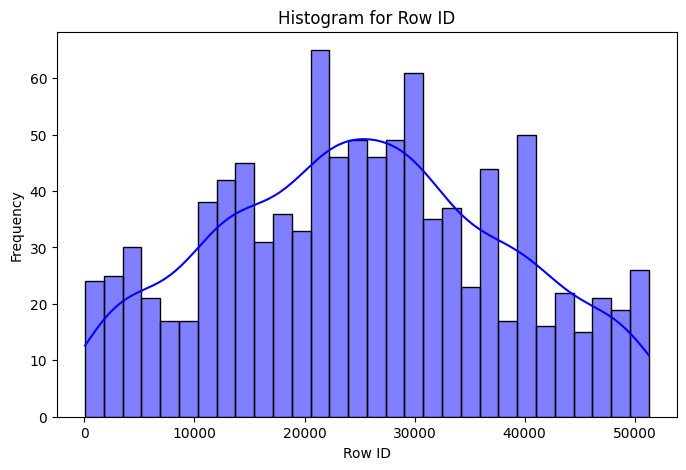

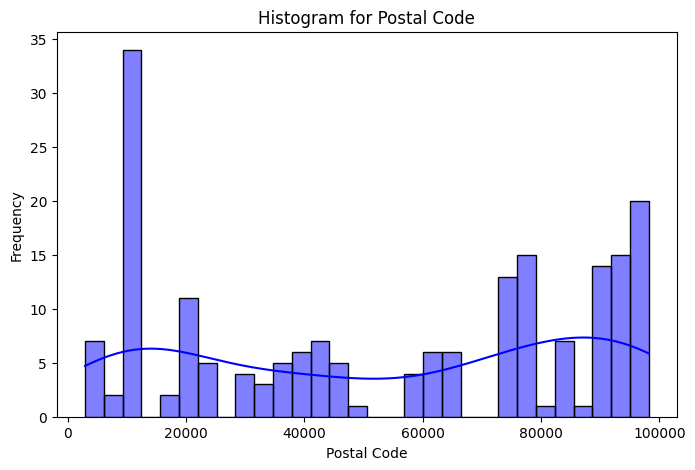

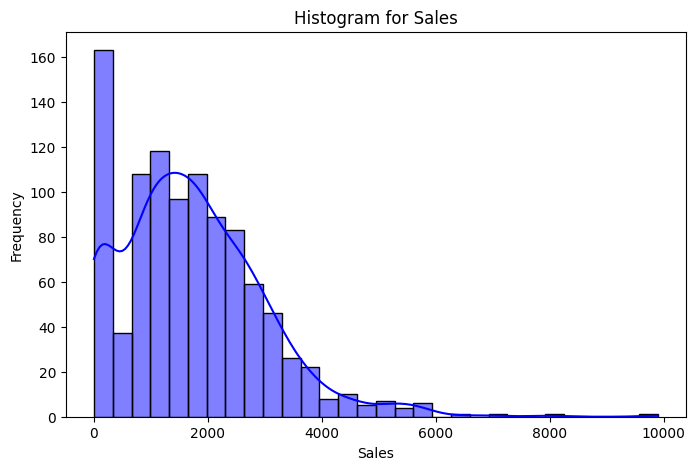

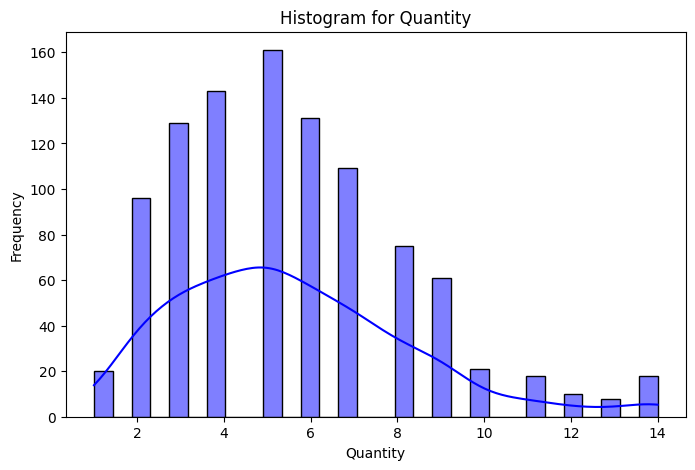

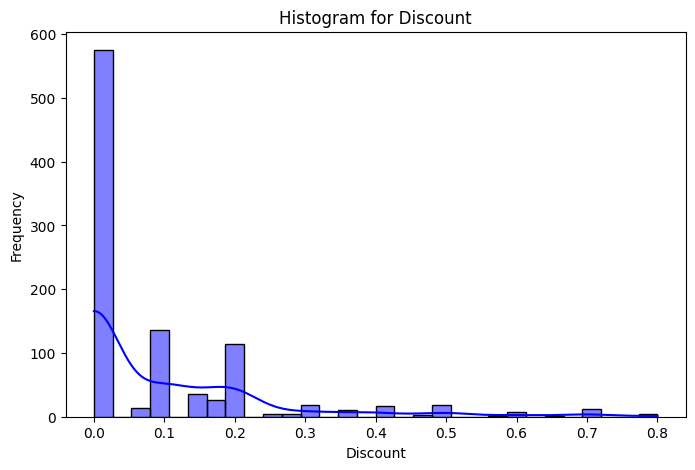

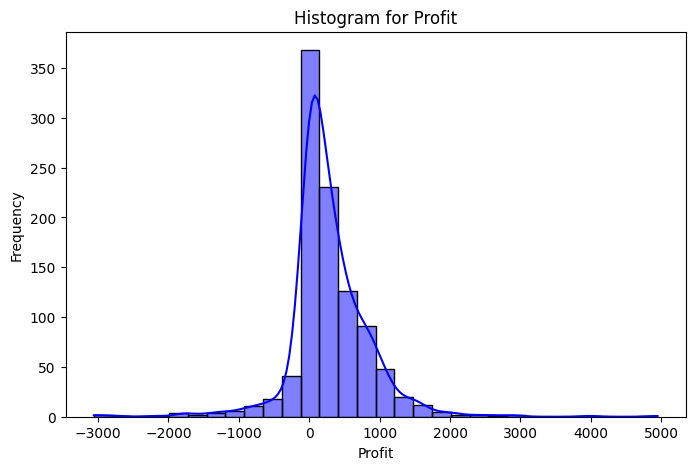

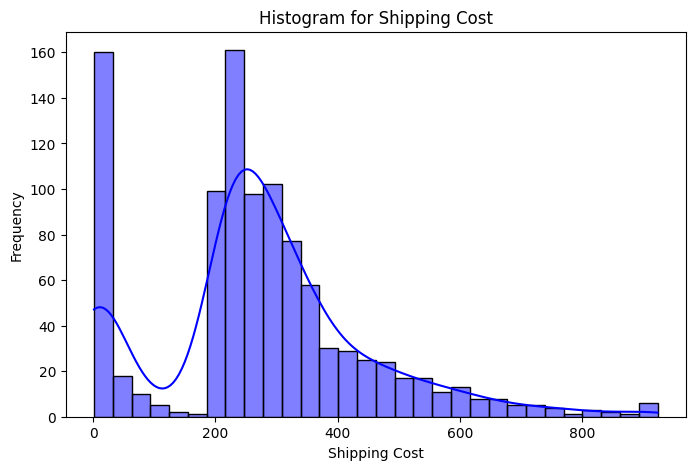

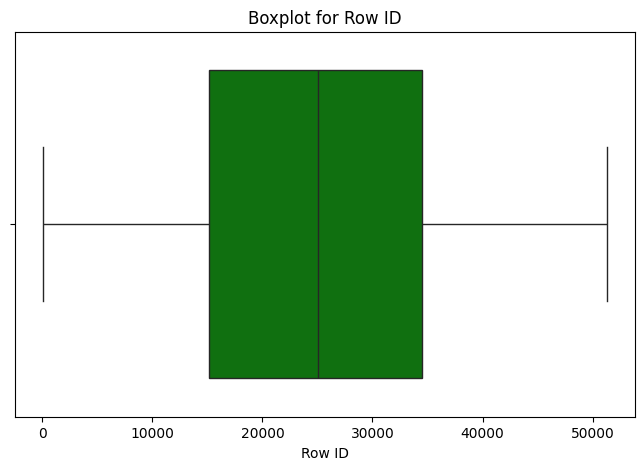

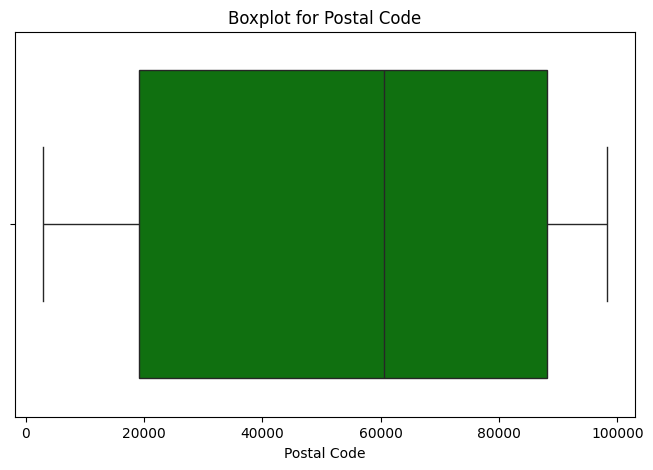

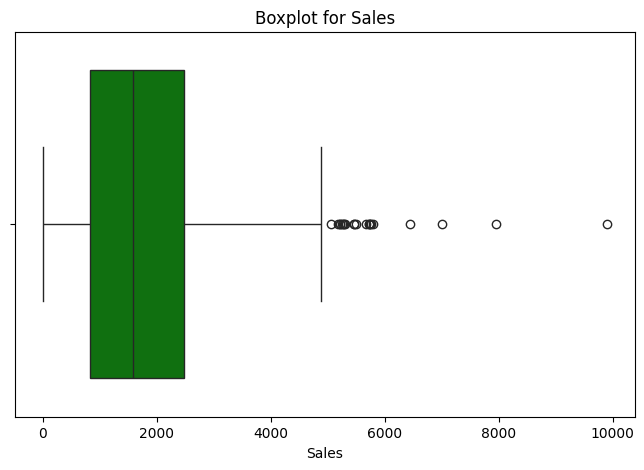

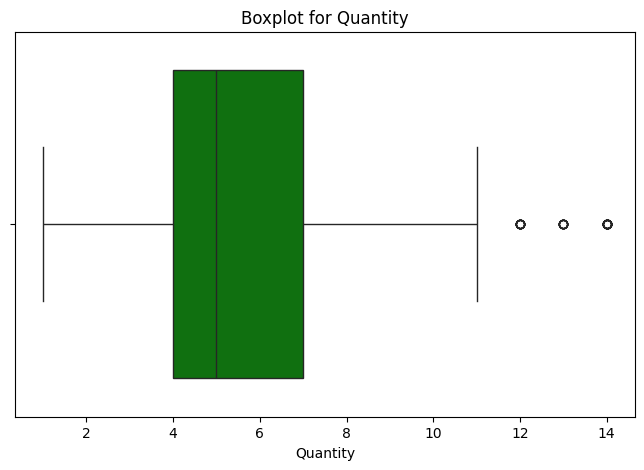

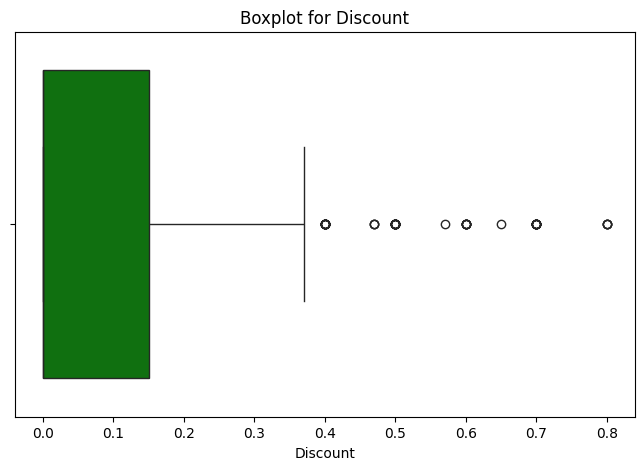

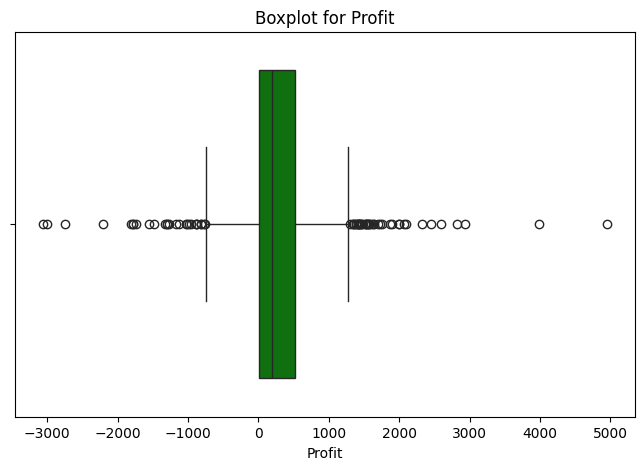

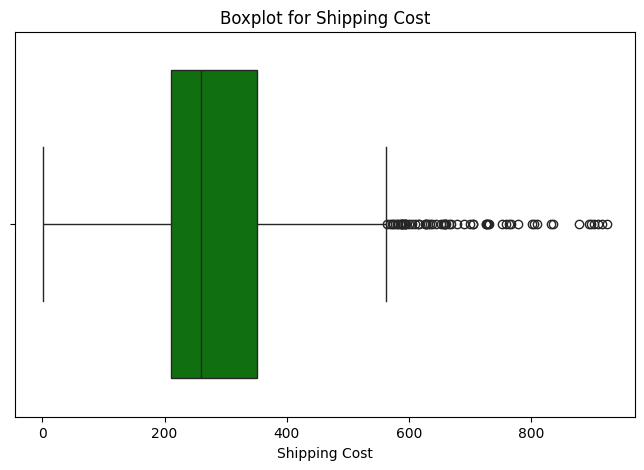

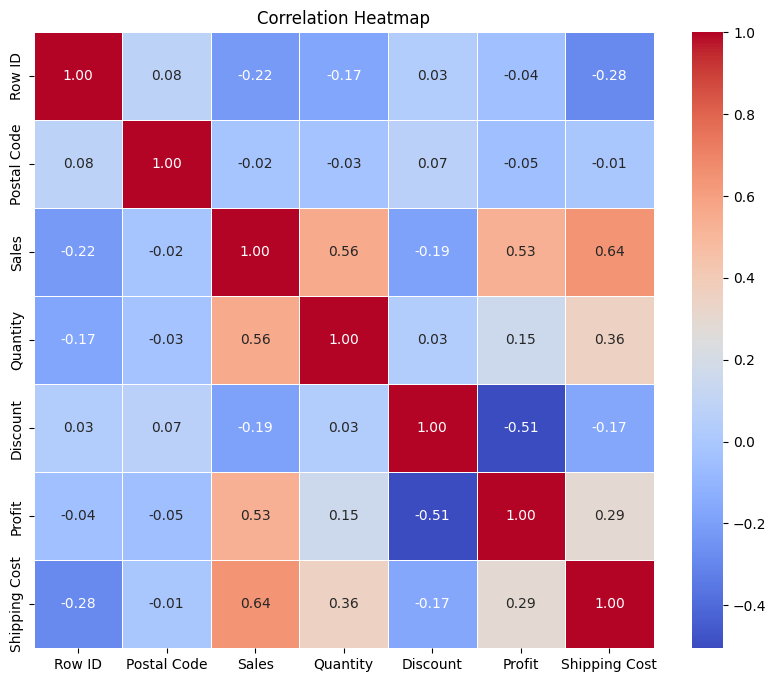

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Global_Superstore(CSV) (1).csv'
data = pd.read_csv(file_path)
numeric_cols = data.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col], color='green')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-4-163c0221120e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


Cleaned dataset saved to cleaned_dataset.csv

Summary Report:
                       mean        median           std      variance
Row ID         25079.328000  25084.500000  1.289773e+04  1.663514e+08
Postal Code    53966.170103  53966.170103  8.080354e-10  6.529212e-19
Sales           1691.190200   1585.115000  1.188269e+03  1.411983e+06
Quantity           5.496000      5.000000  2.552548e+00  6.515499e+00
Discount           0.082235      0.000000  1.149724e-01  1.321866e-02
Profit           283.934625    190.685000  4.333963e+02  1.878323e+05
Shipping Cost    264.396966    258.897500  1.569381e+02  2.462955e+04


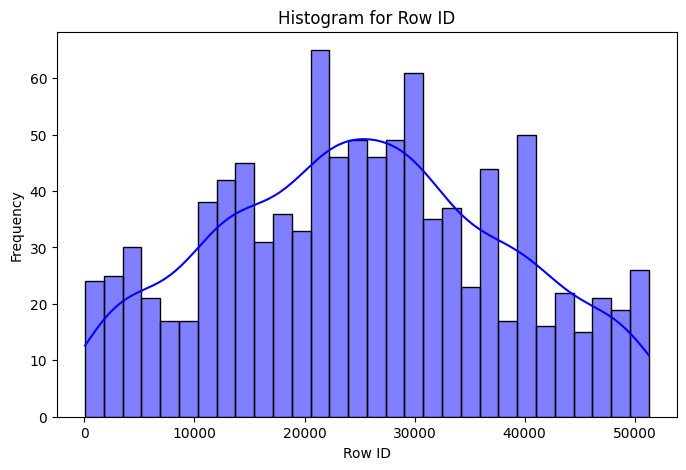

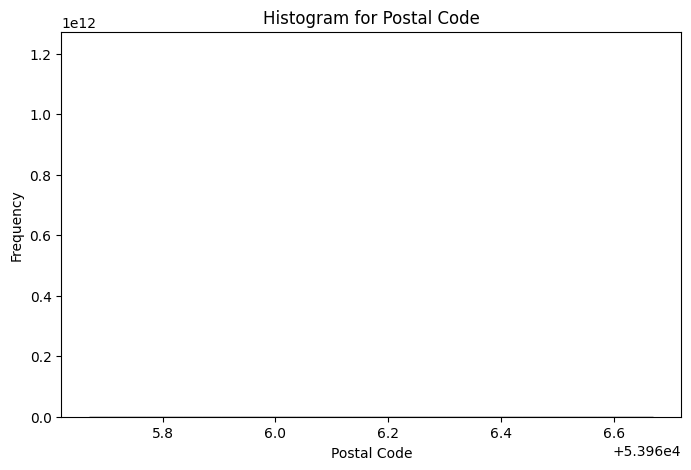

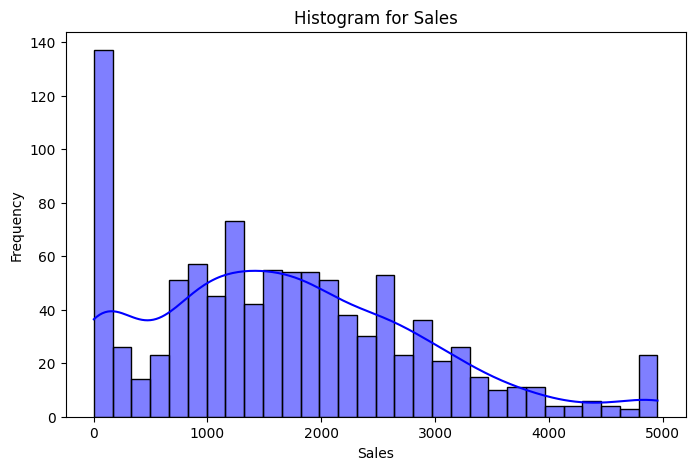

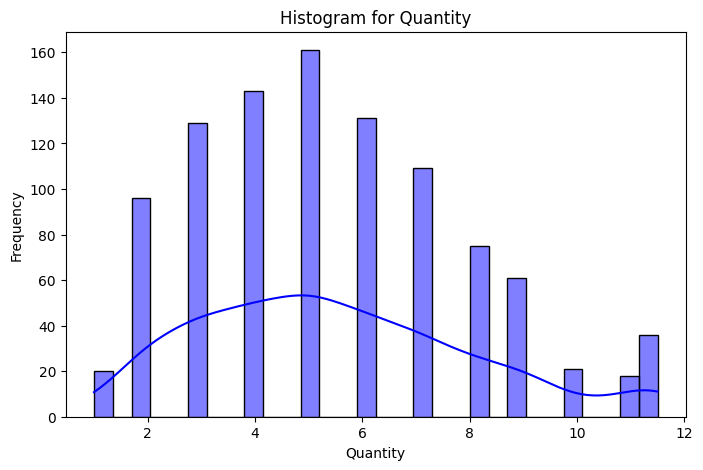

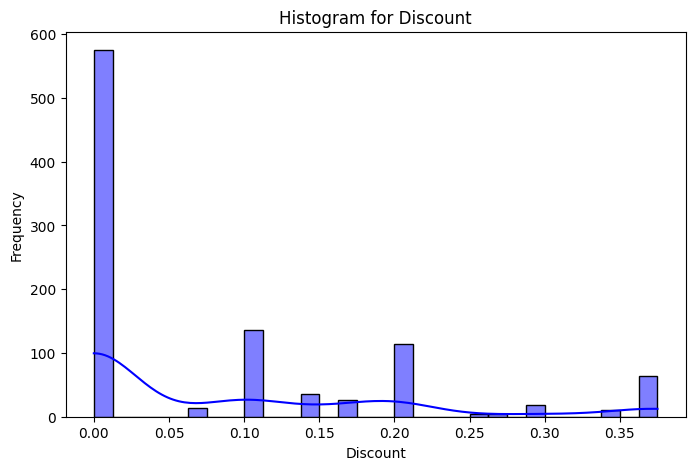

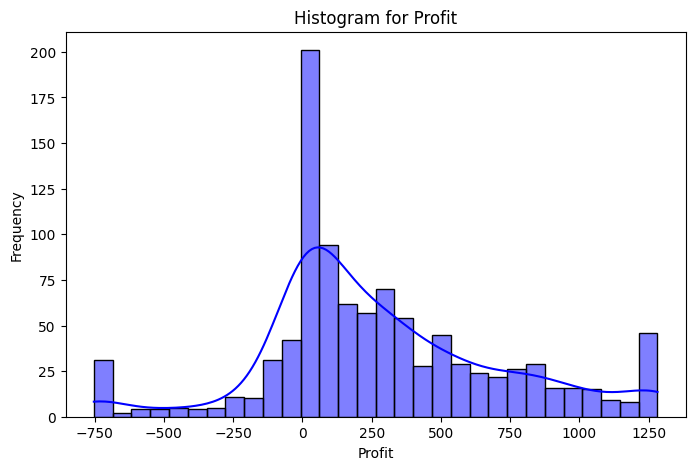

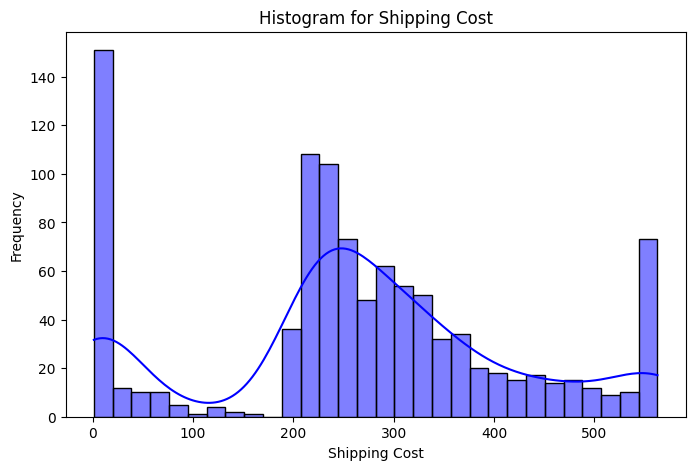

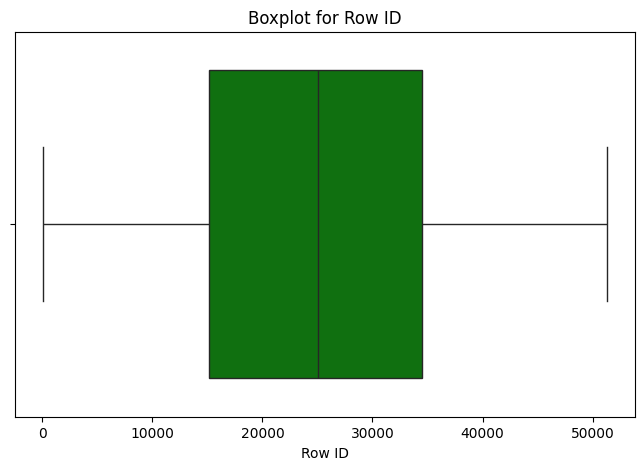

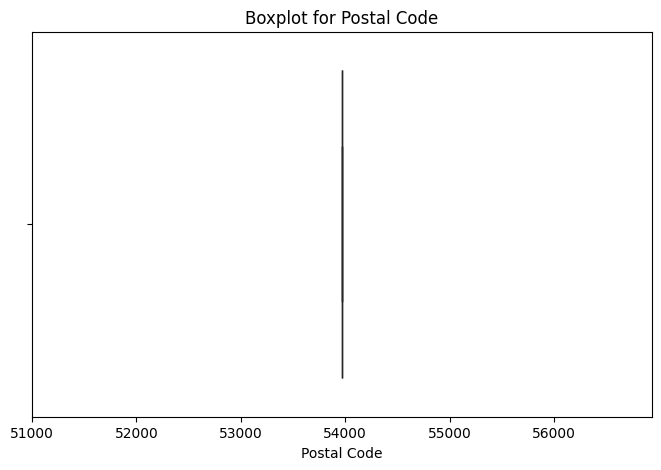

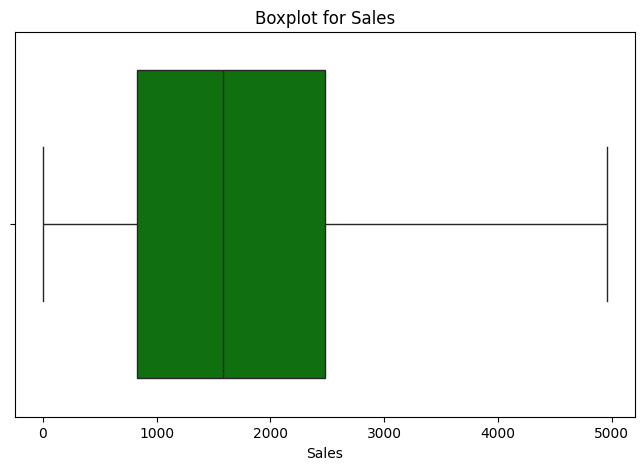

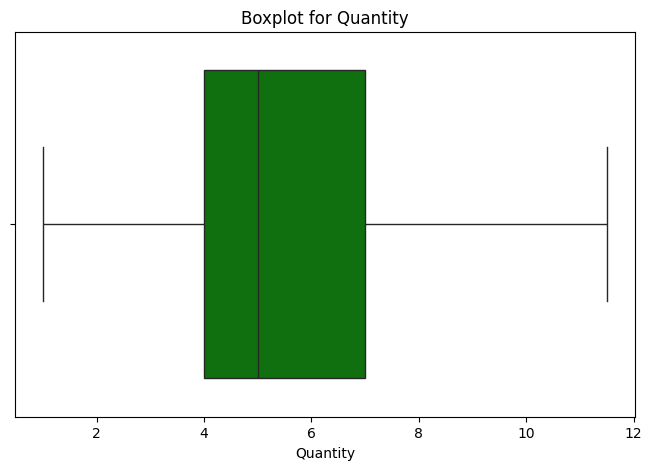

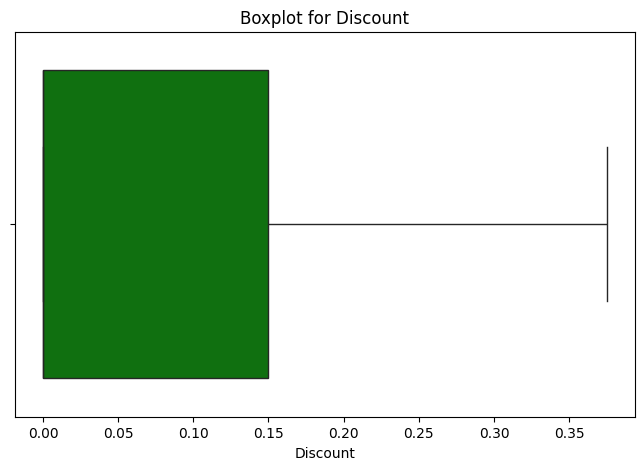

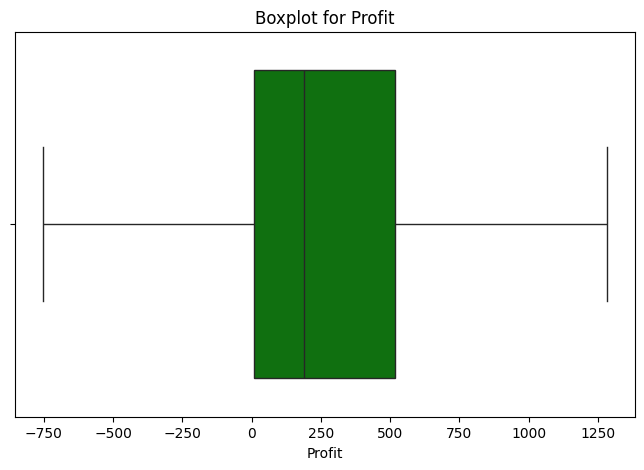

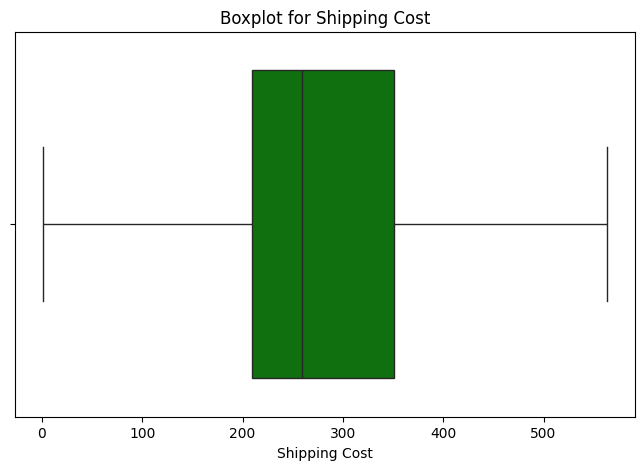

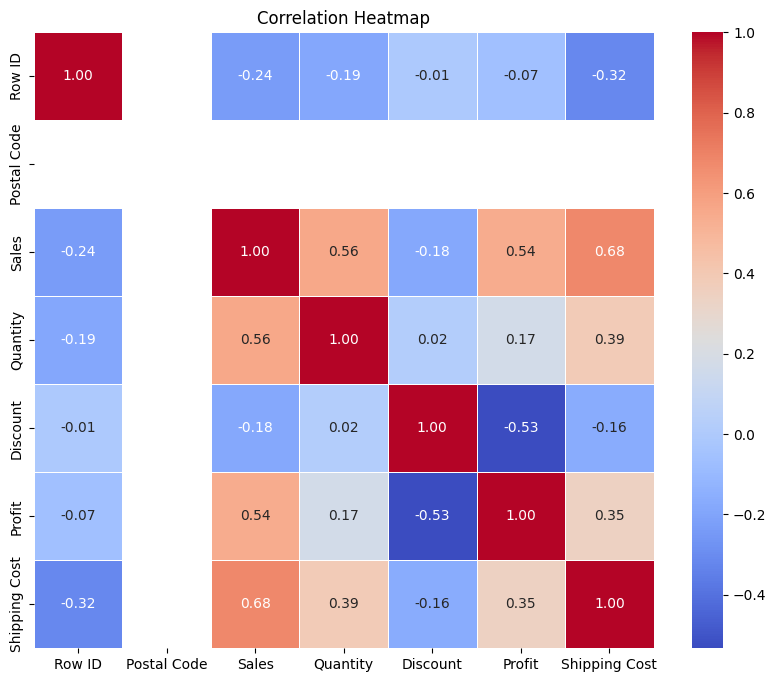


Potential anomalies or unique patterns:

Value counts for Order ID:
Order ID
CA-2014-AH10120140-41992    7
CA-2015-AH10075140-42301    6
CA-2013-AB10105140-41585    6
CA-2012-AB10150140-40972    5
CA-2014-AB10060140-41884    5
                           ..
IN-2012-AS1028558-41221     1
ES-2015-LD1685545-42265     1
MX-2015-NS1850528-42059     1
MX-2014-CM1271582-41885     1
ID-2015-RP19855130-42348    1
Name: count, Length: 867, dtype: int64

Value counts for Order Date:
Order Date
12/19/2014    11
11/20/2015    10
9/17/2015      7
10/24/2015     6
12/18/2014     6
              ..
6/2/2012       1
8/17/2014      1
11/3/2015      1
12/25/2013     1
1/19/2014      1
Name: count, Length: 599, dtype: int64

Value counts for Ship Date:
Ship Date
12/22/2014    13
10/25/2015     9
9/19/2015      8
3/7/2012       8
6/27/2014      7
              ..
1/13/2014      1
9/14/2014      1
3/22/2015      1
6/14/2013      1
1/26/2014      1
Name: count, Length: 613, dtype: int64

Value counts for Shi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Global_Superstore(CSV) (1).csv'
data = pd.read_csv(file_path)
for col in data.select_dtypes(include=[np.number]):
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)
for col in data.select_dtypes(include=[object]):
    if data[col].isnull().sum() > 0:
        data[col].fillna('Missing', inplace=True)
data.drop_duplicates(inplace=True)
for col in data.select_dtypes(include=[np.number]):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
cleaned_file_path = 'cleaned_dataset.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")
numeric_data = data.select_dtypes(include=[np.number])
summary = numeric_data.describe().T
summary['median'] = numeric_data.median()
summary['variance'] = numeric_data.var()
print("\nSummary Report:")
print(summary[['mean', 'median', 'std', 'variance']])
for col in numeric_data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
for col in numeric_data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col], color='green')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
print("\nPotential anomalies or unique patterns:")
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())


**Project 2: Sales Performance Analysis**

In [1]:
import pandas as pd
import numpy as np
file_path = '/content/sales_data (2).csv'
data = pd.read_csv(file_path)
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows of the Dataset:\n", data.head())
print("\nColumns and Data Types:\n", data.dtypes)
print("\nSummary of Missing Values:\n", data.isnull().sum())
print("\nTotal Missing Values in the Dataset:", data.isnull().sum().sum())
print("\nDataset Summary:\n", data.describe(include='all'))


Dataset Shape: (100, 7)

First 5 Rows of the Dataset:
       Product Region    Sales  Profit  Discount         Category        Date
0      Tablet  North  4348.20  689.64         0  Office Supplies  2025-01-17
1      Tablet   West  4429.32  887.34         0      Accessories  2025-01-17
2       Mouse  North  2143.16  271.18        10      Electronics  2025-01-17
3  Smartphone   West  1098.88  825.07        25  Office Supplies  2025-01-17
4  Smartphone  South  3012.86  993.96        25      Electronics  2025-01-17

Columns and Data Types:
 Product      object
Region       object
Sales       float64
Profit      float64
Discount      int64
Category     object
Date         object
dtype: object

Summary of Missing Values:
 Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

Total Missing Values in the Dataset: 0

Dataset Summary:
        Product Region        Sales      Profit    Discount     Category  \
count      100    100   100.0

In [2]:
import pandas as pd
file_path = '/content/sales_data (2).csv'
data = pd.read_csv(file_path)
data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
print("\nMissing values after filling:\n", data.isnull().sum())
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    print("\nDate column converted to datetime. First 5 values:\n", data['Date'].head())
else:
    print("\n'Date' column not found in the dataset.")
data.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'")


Shape after removing duplicates: (100, 7)

Missing values after filling:
 Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

Date column converted to datetime. First 5 values:
 0   2025-01-17
1   2025-01-17
2   2025-01-17
3   2025-01-17
4   2025-01-17
Name: Date, dtype: datetime64[ns]

Cleaned dataset saved as 'cleaned_dataset.csv'


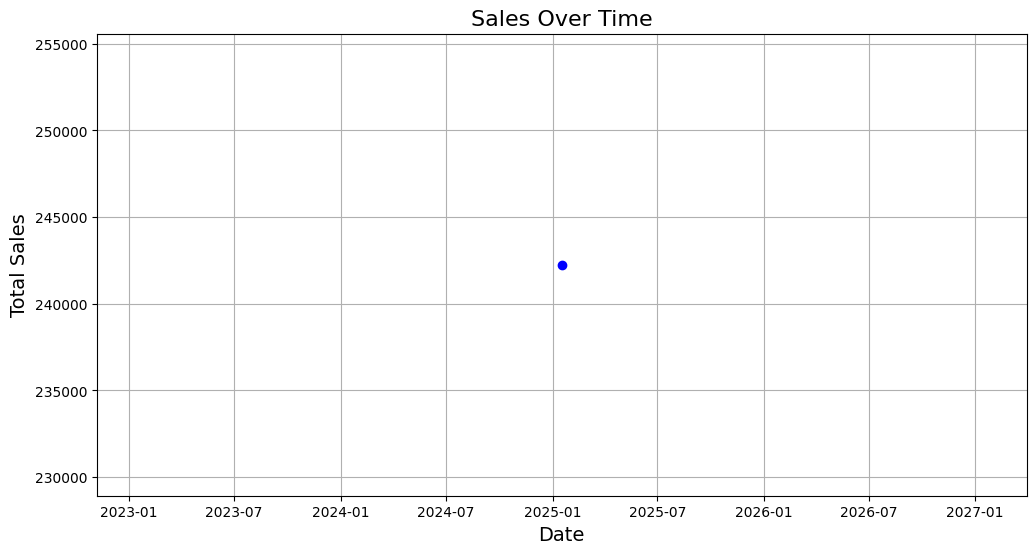

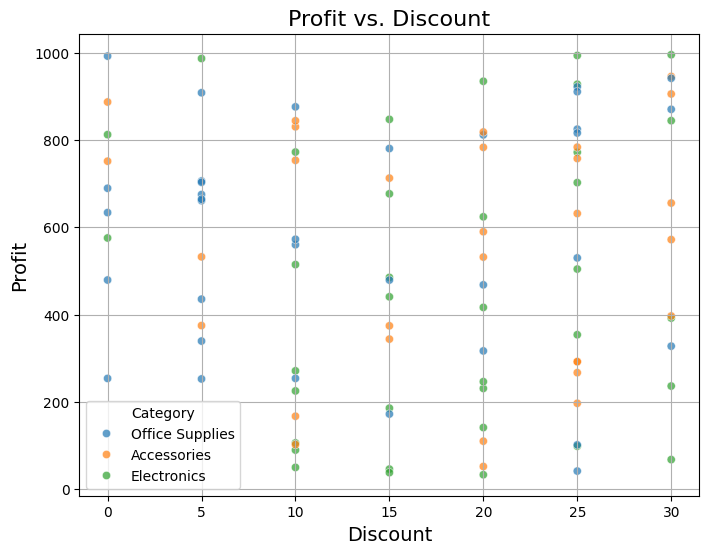

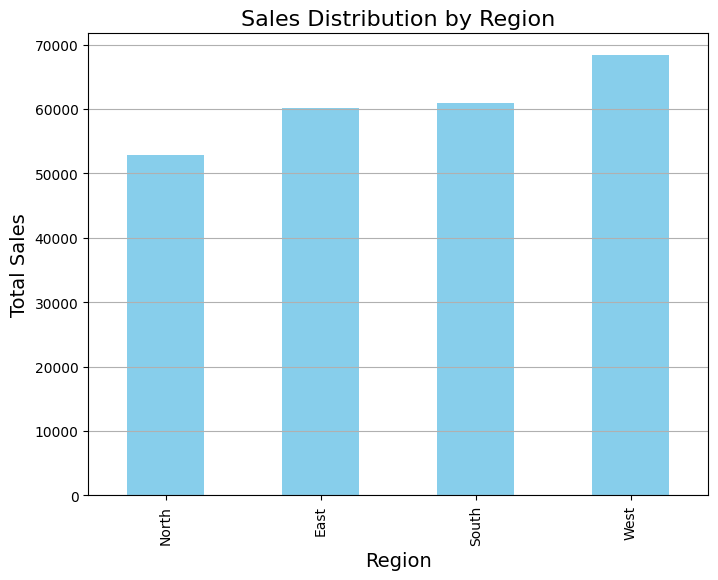

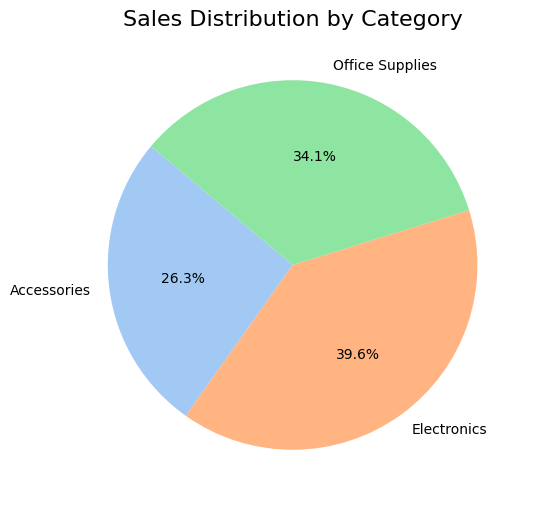

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/sales_data (2).csv'
data = pd.read_csv(file_path)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
if 'Date' in data.columns and 'Sales' in data.columns:
    sales_over_time = data.groupby('Date')['Sales'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(sales_over_time.index, sales_over_time.values, marker='o', color='blue')
    plt.title('Sales Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total Sales', fontsize=14)
    plt.grid(True)
    plt.show()
else:
    print("Ensure the dataset contains 'Date' and 'Sales' columns for time series analysis.")
if 'Profit' in data.columns and 'Discount' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Discount', y='Profit', hue='Category', alpha=0.7)
    plt.title('Profit vs. Discount', fontsize=16)
    plt.xlabel('Discount', fontsize=14)
    plt.ylabel('Profit', fontsize=14)
    plt.grid(True)
    plt.legend(title='Category')
    plt.show()
else:
    print("Ensure the dataset contains 'Profit' and 'Discount' columns for scatter plot.")
if 'Region' in data.columns and 'Category' in data.columns and 'Sales' in data.columns:
    region_sales = data.groupby('Region')['Sales'].sum().sort_values()
    plt.figure(figsize=(8, 6))
    region_sales.plot(kind='bar', color='skyblue')
    plt.title('Sales Distribution by Region', fontsize=16)
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Total Sales', fontsize=14)
    plt.grid(axis='y')
    plt.show()
    category_sales = data.groupby('Category')['Sales'].sum()
    plt.figure(figsize=(8, 6))
    category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Sales Distribution by Category', fontsize=16)
    plt.ylabel('')
    plt.show()
else:
    print("Ensure the dataset contains 'Region', 'Category', and 'Sales' columns for bar and pie plots.")


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
file_path = '/content/sales_data (2).csv'
data = pd.read_csv(file_path)
if 'Sales' in data.columns and 'Profit' in data.columns and 'Discount' in data.columns:
    features = data[['Profit', 'Discount']]
    target = data['Sales']
    features = features.fillna(features.mean())
    target = target.fillna(target.mean())
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Model Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("\nModel Coefficients:")
    for feature, coef in zip(['Profit', 'Discount'], model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
else:
    print("Ensure the dataset contains 'Sales', 'Profit', and 'Discount' columns.")


Model Evaluation:
Mean Squared Error (MSE): 1298546.41
R-squared (R2): 0.06

Model Coefficients:
Profit: 0.2283
Discount: -23.4511
Intercept: 2660.8379


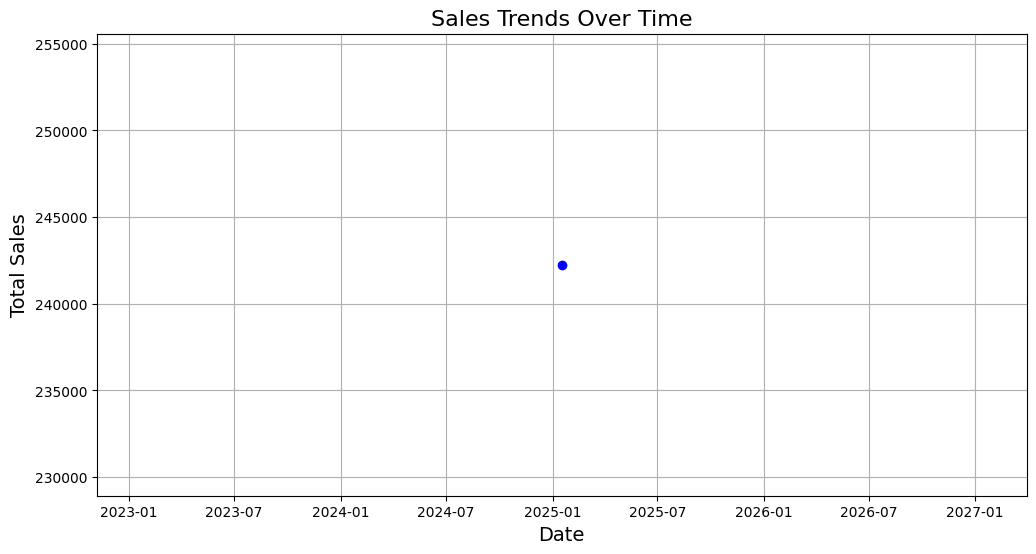

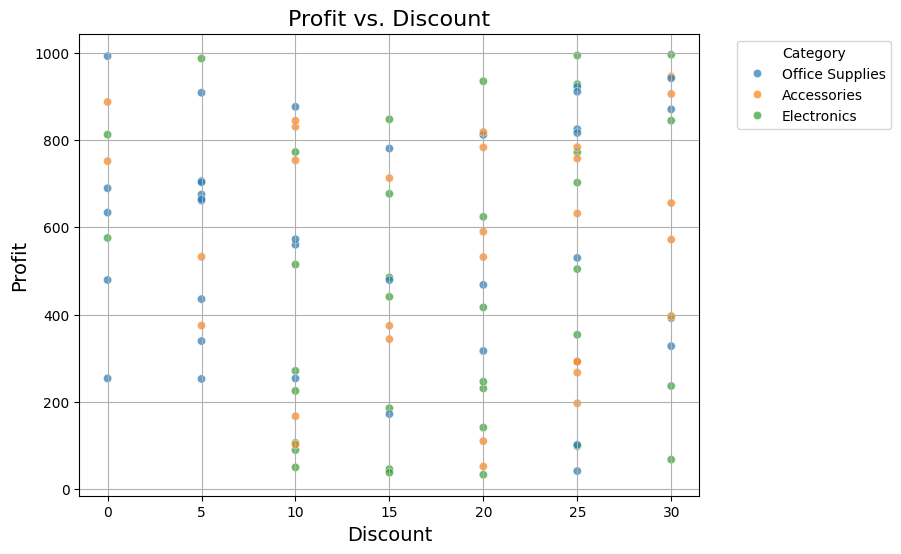

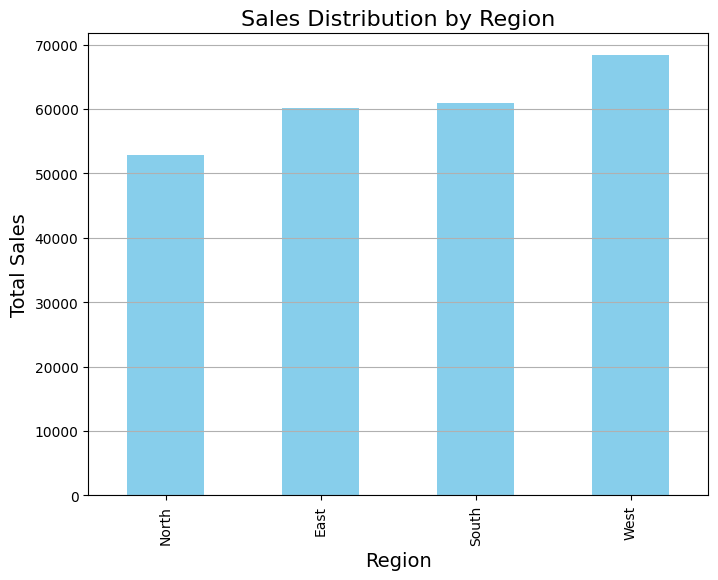

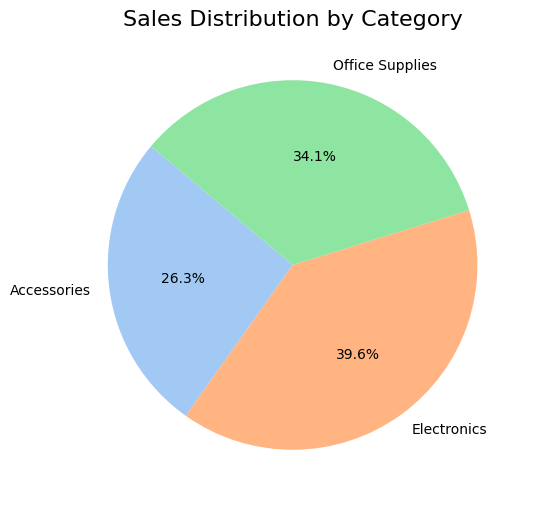

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/sales_data (2).csv'
data = pd.read_csv(file_path)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
if 'Date' in data.columns and 'Sales' in data.columns:
    sales_over_time = data.groupby('Date')['Sales'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(sales_over_time.index, sales_over_time.values, marker='o', color='blue')
    plt.title('Sales Trends Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total Sales', fontsize=14)
    plt.grid(True)
    plt.show()
else:
    print("Ensure the dataset contains 'Date' and 'Sales' columns for the time series plot.")
if 'Profit' in data.columns and 'Discount' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Discount', y='Profit', hue='Category', alpha=0.7)
    plt.title('Profit vs. Discount', fontsize=16)
    plt.xlabel('Discount', fontsize=14)
    plt.ylabel('Profit', fontsize=14)
    plt.grid(True)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("Ensure the dataset contains 'Profit' and 'Discount' columns for the scatter plot.")
if 'Region' in data.columns and 'Category' in data.columns and 'Sales' in data.columns:
    region_sales = data.groupby('Region')['Sales'].sum().sort_values()
    plt.figure(figsize=(8, 6))
    region_sales.plot(kind='bar', color='skyblue')
    plt.title('Sales Distribution by Region', fontsize=16)
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Total Sales', fontsize=14)
    plt.grid(axis='y')
    plt.show()
    category_sales = data.groupby('Category')['Sales'].sum()
    plt.figure(figsize=(8, 6))
    category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Sales Distribution by Category', fontsize=16)
    plt.ylabel('')
    plt.show()
else:
    print("Ensure the dataset contains 'Region', 'Category', and 'Sales' columns for bar and pie charts.")


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
file_path = '/content/sales_data (2).csv'
data = pd.read_csv(file_path)
if all(col in data.columns for col in ['Sales', 'Profit', 'Discount']):
    features = data[['Profit', 'Discount']]
    target = data['Sales']
    features = features.fillna(features.mean())
    target = target.fillna(target.mean())
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("\nModel Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("\nModel Coefficients:")
    for feature, coef in zip(['Profit', 'Discount'], model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

else:
    print("Ensure the dataset contains 'Sales', 'Profit', and 'Discount' columns.")



Model Evaluation:
Mean Squared Error (MSE): 1298546.41
R-squared (R2): 0.06

Model Coefficients:
Profit: 0.2283
Discount: -23.4511
Intercept: 2660.8379
